In [61]:
import pandas as pd

In [62]:
df = pd.read_csv("../data/titanic.csv")

In [63]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [65]:
df = df.drop(["PassengerId", "Ticket", "Name", "Cabin"], axis = 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [66]:
df.columns = [x.lower().strip().replace(" ", "_") for x in df.columns]
df.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [67]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [68]:
df_is_female = pd.get_dummies(df["sex"])[["female"]]
df_is_female.columns = ["is_female"]
df_is_female.head()

,is_female
0,0
1,1
2,1
3,1
4,0


In [69]:
df = df.join(df_is_female)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,is_female
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [70]:
df = df.drop(["sex"], axis = 1)
df.head()

,survived,pclass,age,sibsp,parch,fare,embarked,is_female
0,0,3,22.0,1,0,7.2500,S,0
1,1,1,38.0,1,0,71.2833,C,1
2,1,3,26.0,0,0,7.9250,S,1
3,1,1,35.0,1,0,53.1000,S,1
4,0,3,35.0,0,0,8.0500,S,0


In [71]:
embarked_df = pd.get_dummies(df["embarked"], prefix="embarked").drop(["embarked_S"], axis = 1)
embarked_df.columns = [x.lower() for x in embarked_df.columns]
embarked_df.head()

,embarked_c,embarked_q
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0


In [72]:
df = df.join(embarked_df)
df.head()

,survived,pclass,age,sibsp,parch,fare,embarked,is_female,embarked_c,embarked_q
0,0,3,22.0,1,0,7.2500,S,0,0,0
1,1,1,38.0,1,0,71.2833,C,1,1,0
2,1,3,26.0,0,0,7.9250,S,1,0,0
3,1,1,35.0,1,0,53.1000,S,1,0,0
4,0,3,35.0,0,0,8.0500,S,0,0,0


In [73]:
df = df.drop(["embarked"], axis = 1)
df.head()

,survived,pclass,age,sibsp,parch,fare,is_female,embarked_c,embarked_q
0,0,3,22.0,1,0,7.2500,0,0,0
1,1,1,38.0,1,0,71.2833,1,1,0
2,1,3,26.0,0,0,7.9250,1,0,0
3,1,1,35.0,1,0,53.1000,1,0,0
4,0,3,35.0,0,0,8.0500,0,0,0


In [74]:
pclass_df = pd.get_dummies(df["pclass"], prefix="pclass").drop(["pclass_3"], axis = 1)
pclass_df.head()

,pclass_1,pclass_2
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0


In [75]:
df = df.join(pclass_df)
df = df.drop(["pclass"], axis = 1)
df.head()

,survived,age,sibsp,parch,fare,is_female,embarked_c,embarked_q,pclass_1,pclass_2
0,0,22.0,1,0,7.2500,0,0,0,0,0
1,1,38.0,1,0,71.2833,1,1,0,1,0
2,1,26.0,0,0,7.9250,1,0,0,0,0
3,1,35.0,1,0,53.1000,1,0,0,1,0
4,0,35.0,0,0,8.0500,0,0,0,0,0


<AxesSubplot:ylabel='Frequency'>

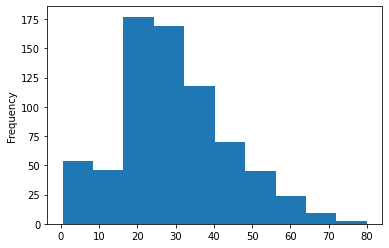

In [76]:
df["age"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

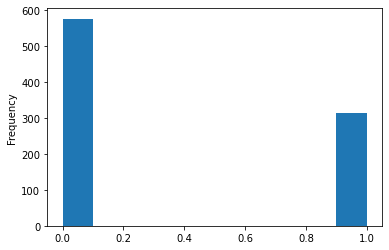

In [77]:
df["is_female"].plot.hist()

In [79]:
df.to_csv("../data/processed.csv", index=False)